# Objective:

Apply various kernel architecture on MNIST Dataset.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\ABHISEK\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 3 Layer Conv with (3,3) kernel Architecture

In [7]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.7604 - acc: 0.7514 - val_loss: 0.1430 - val_acc: 0.9605
Epoch 2/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2971 - acc: 0.9146 - val_loss: 0.0959 - val_acc: 0.9727
Epoch 3/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2249 - acc: 0.9366 - val_loss: 0.0815 - val_acc: 0.9763
Epoch 4/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1933 - acc: 0.9457 - val_loss: 0.0669 - val_acc: 0.9810
Epoch 5/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1713 - acc: 0.9526 - val_loss: 0.0651 - val_acc: 0.9814
Epoch 6/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1537 - acc: 0.9569 - val_loss: 0.0595 - val_acc: 0.9820
Epoch 7/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1464 - acc: 0.9583 - val_loss: 0.0552 - val_acc

<IPython.core.display.Javascript object>


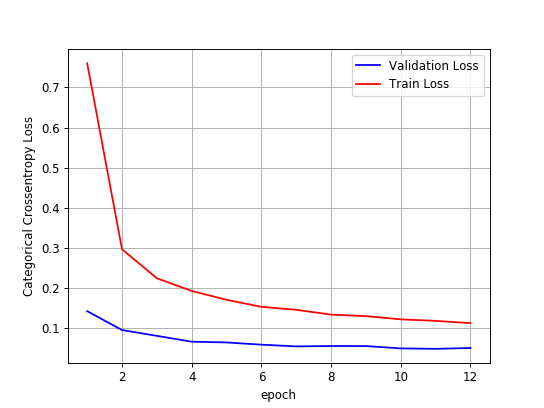

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Layer Conv with (3,3) kernel Architecture

In [13]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 4
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.7580 - acc: 0.7422 - val_loss: 0.1083 - val_acc: 0.9689
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1267 - acc: 0.9659 - val_loss: 0.0435 - val_acc: 0.9876
Epoch 3/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0845 - acc: 0.9777 - val_loss: 0.0366 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0691 - acc: 0.9815 - val_loss: 0.0529 - val_acc: 0.9863
Epoch 5/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0580 - acc: 0.9847 - val_loss: 0.0260 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0488 - acc: 0.9870 - val_loss: 0.0333 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0444 - acc: 0.9880 - val_loss: 0.0226 - 

<IPython.core.display.Javascript object>


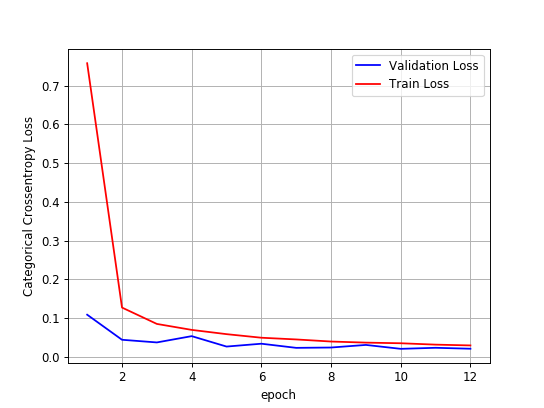

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Layer Conv with (3,3) kernel Architecture

In [15]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 4
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 5
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# block 6
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# block 7
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 149s 2ms/step - loss: 1.9982 - acc: 0.2256 - val_loss: 0.9065 - val_acc: 0.5739
Epoch 2/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.3513 - acc: 0.8870 - val_loss: 0.0826 - val_acc: 0.9780
Epoch 3/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.1049 - acc: 0.9745 - val_loss: 0.0533 - val_acc: 0.9856
Epoch 4/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0753 - acc: 0.9818 - val_loss: 0.0730 - val_acc: 0.9787
Epoch 5/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0588 - acc: 0.9860 - val_loss: 0.0378 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0532 - acc: 0.9876 - val_loss: 0.0520 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0419 - acc: 0.9896 - val_loss: 0.0355 - 

<IPython.core.display.Javascript object>


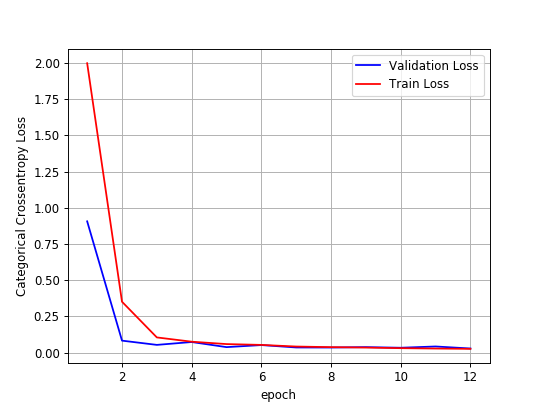

In [16]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Layer Conv with (5,5) kernel Architecture

In [17]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (5, 5), activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (5, 5), activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.3799 - acc: 0.8760 - val_loss: 0.0465 - val_acc: 0.9843
Epoch 2/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0983 - acc: 0.9714 - val_loss: 0.0377 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0701 - acc: 0.9798 - val_loss: 0.0293 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0586 - acc: 0.9832 - val_loss: 0.0239 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0213 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0432 - acc: 0.9877 - val_loss: 0.0209 - val_acc: 0.9933
Epoch 7/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0396 - acc: 0.9887 - val_loss: 0.0178 - 

<IPython.core.display.Javascript object>


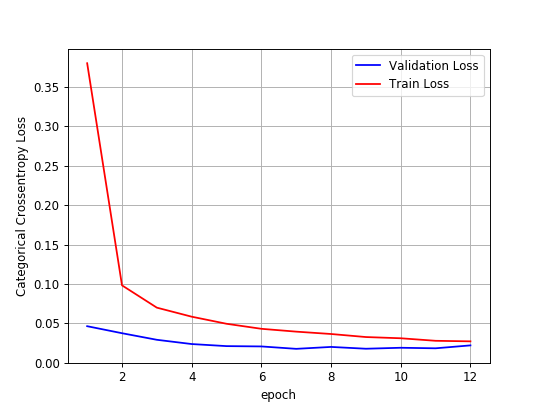

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Layer Conv with (5,5) kernel Architecture

In [19]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 4
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 294s 5ms/step - loss: 0.9499 - acc: 0.6592 - val_loss: 0.1117 - val_acc: 0.9699
Epoch 2/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.1042 - acc: 0.9729 - val_loss: 0.0444 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0685 - acc: 0.9832 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0491 - acc: 0.9877 - val_loss: 0.0347 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0394 - acc: 0.9901 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0305 - acc: 0.9923 - val_loss: 0.0310 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0289 - acc: 0.9926 - val_loss: 0.0361 - 

<IPython.core.display.Javascript object>


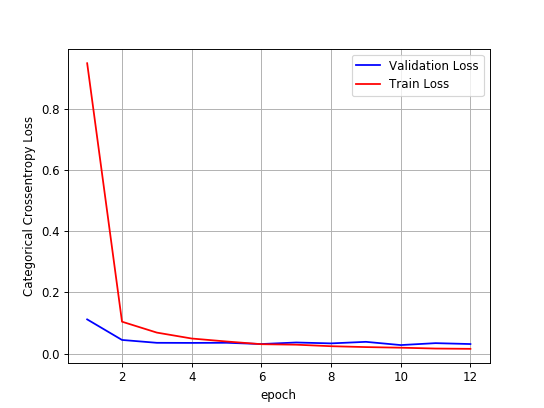

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Layer Conv with (5,5) kernel Architecture

In [21]:
from keras.layers.normalization import BatchNormalization
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 4
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# block 6
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# block 7
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 592s 10ms/step - loss: 0.4706 - acc: 0.8646 - val_loss: 0.5005 - val_acc: 0.9187
Epoch 2/12
60000/60000 [==============================] - 588s 10ms/step - loss: 0.1309 - acc: 0.9701 - val_loss: 0.0573 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 586s 10ms/step - loss: 0.0857 - acc: 0.9812 - val_loss: 0.1032 - val_acc: 0.9777
Epoch 4/12
60000/60000 [==============================] - 587s 10ms/step - loss: 0.0682 - acc: 0.9854 - val_loss: 0.0529 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 618s 10ms/step - loss: 0.0577 - acc: 0.9875 - val_loss: 0.0584 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 588s 10ms/step - loss: 0.0528 - acc: 0.9887 - val_loss: 0.0586 - val_acc: 0.9881
Epoch 7/12
60000/60000 [==============================] - 594s 10ms/step - loss: 0.0443 - acc: 0.9904 - val_loss: 0.

<IPython.core.display.Javascript object>


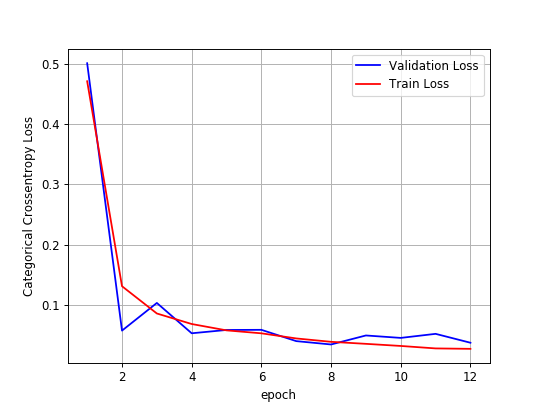

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Layer Conv with (2,2) kernel Architecture

In [23]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (2, 2), activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (2, 2), activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6067 - acc: 0.7962 - val_loss: 0.1250 - val_acc: 0.9589
Epoch 2/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2134 - acc: 0.9355 - val_loss: 0.0817 - val_acc: 0.9731
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1650 - acc: 0.9500 - val_loss: 0.0604 - val_acc: 0.9803
Epoch 4/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1394 - acc: 0.9577 - val_loss: 0.0483 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1240 - acc: 0.9623 - val_loss: 0.0472 - val_acc: 0.9840
Epoch 6/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1112 - acc: 0.9658 - val_loss: 0.0464 - val_acc: 0.9855
Epoch 7/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1025 - acc: 0.9690 - val_loss: 0.0396 - val_acc

<IPython.core.display.Javascript object>


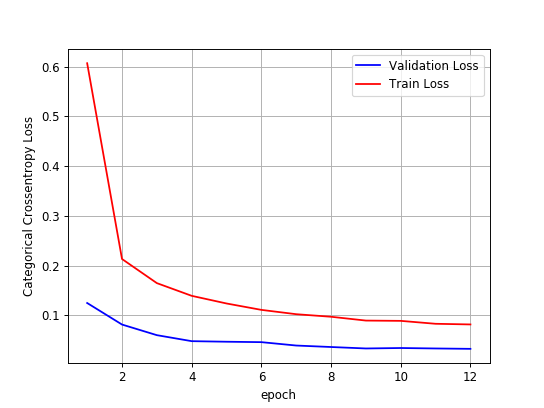

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Layer Conv with (2,2) kernel Architecture

In [25]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 4
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.9594 - acc: 0.6654 - val_loss: 0.1587 - val_acc: 0.9536
Epoch 2/12
60000/60000 [==============================] - 90s 1ms/step - loss: 0.1765 - acc: 0.9502 - val_loss: 0.0608 - val_acc: 0.9814
Epoch 3/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1166 - acc: 0.9675 - val_loss: 0.0607 - val_acc: 0.9834
Epoch 4/12
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0907 - acc: 0.9748 - val_loss: 0.0523 - val_acc: 0.9849
Epoch 5/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0743 - acc: 0.9794 - val_loss: 0.0372 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0665 - acc: 0.9816 - val_loss: 0.0362 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0621 - acc: 0.9831 - val_loss: 0.0373 - val_acc

<IPython.core.display.Javascript object>


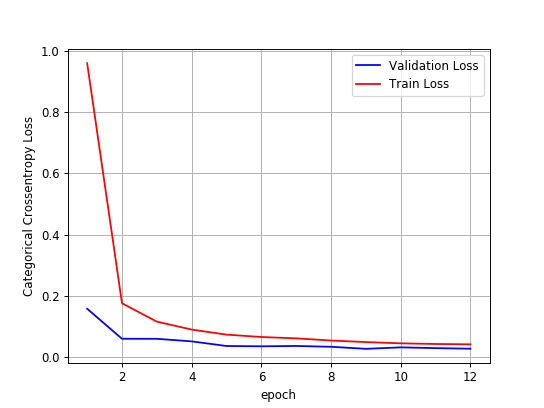

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Layer Conv with (2,2) kernel Architecture

In [27]:
model = Sequential()

# block 1
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))


# block 4
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# block 6
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# block 7
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 257s 4ms/step - loss: 0.8513 - acc: 0.7340 - val_loss: 0.2310 - val_acc: 0.9401
Epoch 2/12
60000/60000 [==============================] - 247s 4ms/step - loss: 0.1764 - acc: 0.9544 - val_loss: 0.1050 - val_acc: 0.9736
Epoch 3/12
60000/60000 [==============================] - 236s 4ms/step - loss: 0.1141 - acc: 0.9709 - val_loss: 0.0752 - val_acc: 0.9797
Epoch 4/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0927 - acc: 0.9772 - val_loss: 0.1160 - val_acc: 0.9732
Epoch 5/12
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0782 - acc: 0.9811 - val_loss: 0.0456 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0691 - acc: 0.9827 - val_loss: 0.0432 - val_acc: 0.9892
Epoch 7/12
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0566 - acc: 0.9856 - val_loss: 0.0501 - 

<IPython.core.display.Javascript object>


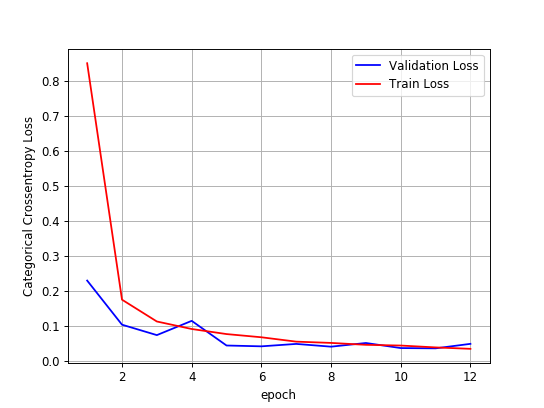

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
nb_epoch = 12
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion:

In [29]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Architecture", "test accuracy"]
x.add_row(["3 Layer Conv with (3,3) kernel Architecture", "0.9859"])
x.add_row(["5 Layer Conv with (3,3) kernel Architecture","0.9937"])
x.add_row(["7 Layer Conv with (3,3) kernel Architecture", "0.993"])
x.add_row(["3 Layer Conv with (5,5) kernel Architecture", "0.9929"])
x.add_row(["5 Layer Conv with (5,5) kernel Architecture", "0.9926"])
x.add_row(["7 Layer Conv with (5,5) kernel Architecture", "0.9932"])
x.add_row(["3 Layer Conv with (2,2) kernel Architecture", "0.9894"])
x.add_row(["5 Layer Conv with (2,2) kernel Architecture", "0.9926"])
x.add_row(["7 Layer Conv with (2,2) kernel Architecture", " 0.9887"])
print(x)



+---------------------------------------------+---------------+
|                 Architecture                | test accuracy |
+---------------------------------------------+---------------+
| 3 Layer Conv with (3,3) kernel Architecture |     0.9859    |
| 5 Layer Conv with (3,3) kernel Architecture |     0.9937    |
| 7 Layer Conv with (3,3) kernel Architecture |     0.993     |
| 3 Layer Conv with (5,5) kernel Architecture |     0.9929    |
| 5 Layer Conv with (5,5) kernel Architecture |     0.9926    |
| 7 Layer Conv with (5,5) kernel Architecture |     0.9932    |
| 3 Layer Conv with (2,2) kernel Architecture |     0.9894    |
| 5 Layer Conv with (2,2) kernel Architecture |     0.9926    |
| 7 Layer Conv with (2,2) kernel Architecture |     0.9887    |
+---------------------------------------------+---------------+
